In [11]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_vector, plot_bloch_multivector
import matplotlib.pyplot as plt

Główną częścią obwodu kwantowego, która odpowiada za to, co dzieje się z kubitami będą bramki kwantowe.  
Bramki można reprezentować w różny sposób.  
Po pierwsze - jako macierz unitarną.  
Po drugie - określając ich działanie na wektory bazowe.  
Po trzecie - na sferze Blocha
  

Na przykład - dla bramki X:  
1. Macierz: $\begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} $
2. Działanie na wektory bazowe: $\begin{cases}
    X\ket{0} = \ket{1} \\
    X\ket{1} = \ket{0}
\end{cases}$

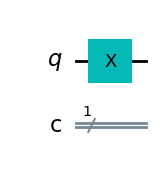

In [2]:
circuit = QuantumCircuit(1,1)
circuit.x(0)
%matplotlib inline
circuit.draw(output='mpl')

In [3]:
# Macierz
simulator = Aer.get_backend('unitary_simulator')
result = execute(circuit, backend=simulator).result()
unitary = result.get_unitary()
print(unitary)

Operator([[0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))


In [5]:
# Bramka X w działaniu na wektory bazowe
circuit = QuantumCircuit(1,1)
initial_state = Statevector.from_instruction(circuit) 

circuit.x(0)
final_state = Statevector.from_instruction(circuit) 

print(f"initial state: {initial_state}")
print(f"final state: {final_state}")

initial state: Statevector([1.+0.j, 0.+0.j],
            dims=(2,))
final state: Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


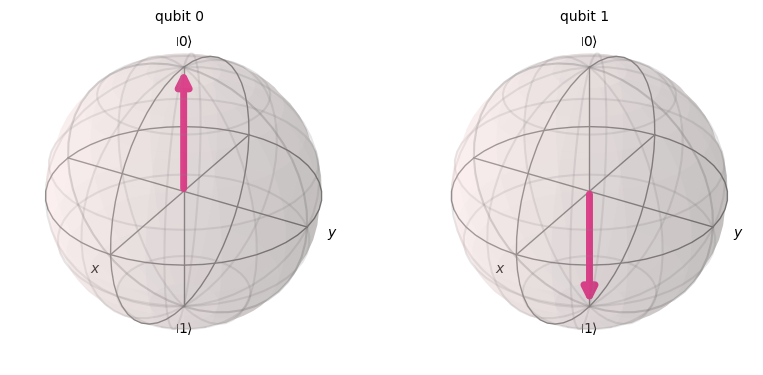

In [20]:
# Jako obrót na sferze Blocha (przejście od stanu |0> do |1>)

# Tworzymy obwód z dwoma kubitami
qc = QuantumCircuit(2)

# Na drugi kubit działamy bramką X
qc.x(1) 
qc.draw()

# Rysujemy stan każdego z kubitów na sferze Blocha
state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)

### Bramki X, Y, Z
efekt działania itp

### Bramka Hadamarda
kluczowa - wprowadza superpozycję stanów

### Bramka fazowa S

**Ćwiczenia**
1. Przygotować układ składający się z jednego kubita w stanie początkowym $\ket{0}$. Przeprowadzić (tj. stworzyć obwód, który przeprowadzi) ten kubit w superpozycję stanów bazowych $\frac{1}{\sqrt{2}}(\ket{0} + \ket{1})$.
2. Przygotować układ składający się z jednego kubita w stanie początkowym $\ket{0}$. Przeprowadzić ten kubit w stan $\frac{1}{\sqrt{2}}(\ket{0} - \ket{1})$.
3. Przygotować układ składający się z dwóch kubitów w stanie $\ket{00}$. Przeprowadzić ten układ w superpozycję wszystkich możliwych stanów bazowych dwukubitowych z równym prawdopodobieństwem, tj. $\frac{1}{2}(\ket{00} + \ket{01} + \ket{10} + \ket{11})$.  
4. Przygotować układ składający się z dwóch kubitów w stanie $\ket{00}$. Przeprowadzić ten układ w stan $\frac{1}{\sqrt{2}}(\ket{01} + \ket{11})$.  
5. Przygotować układ składający się z dwóch kubitów w stanie $\ket{00}$. Przeprowadzić ten układ w stan splątany $\frac{1}{\sqrt{2}}(\ket{01} + \ket{10})$. 
6. Przygotować układ składający się z trzech kubitów w stanie $\ket{000}$. Przeprowadzić ten układ w stan $\frac{1}{\sqrt{2}}(\ket{001} + \ket{011})$.  
7. Przygotować układ trzech kubitów w stanie początkowym $\ket{000}$. Przeprowadzić ten stan początkowy w stan $\frac{1}{2}(\ket{100} + \ket{101} + \ket{110} + \ket{111})$.  
8. Przygotować układ trzech kubitów w stanie początkowym $\ket{000}$. Przeprowadzić ten stan początkowy w stan $\frac{1}{2}(\ket{000} + \ket{001} + \ket{110} + \ket{111})$.  
9. Przygotować układ dwóch kubitów w stanie początkowym $\ket{00} + \ket{11}$. Przeprowadzić ten stan początkowy w stan $\ket{00}$.
10. Przygotować układ trzech kubitów w stanie początkowym $\ket{000} + \ket{111}$. Przeprowadzić ten stan początkowy w stan $\ket{010}$.